In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('test3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### 빈 값 처리 방법 (NULL 처리)
- 그냥 지우기
- 도메인 지식을 이용해 채워넣기
- 평균 대체법
- 해당 column을 label로 두고, 모델을 학습시켜서 예측값으로 빈 값 채우기

In [4]:
# TotalCharges가 없는 row들은 SeniorCitizen이 모두 0이다.
# SeniorCitizen은 대표성이 있는가?

df.loc[df['SeniorCitizen'] == 0]

# SeniorCitizen은 대표성이 없다.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [5]:
# TotalCharges가 없는 row들은 Dependents가 모두 Yes이다.
# Dependents은 대표성이 있는가?

df.loc[df['Dependents'] == 'Yes']

# Dependents은 대표성이 없다.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [6]:
# TotalCharges가 없는 row들은 tenure이 모두 0이다.
# tenure은 대표성이 있는가?

df.loc[df['tenure'] == 0]

# tenure은 대표성이 있다.
# tenure가 0인 row는 TotalCharges의 값이 없다.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df.loc[df['TotalCharges'] == ' ']['customerID'].values

array(['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO',
       '1371-DWPAZ', '7644-OMVMY', '3213-VVOLG', '2520-SGTTA',
       '2923-ARZLG', '4075-WKNIU', '2775-SEFEE'], dtype=object)

In [8]:
df.loc[df['tenure'] == ' ']['customerID'].values

array([], dtype=object)

In [9]:
tc_null = set(df.loc[df['TotalCharges'] == ' ']['customerID'].values)

In [10]:
te_null = set(df.loc[df['tenure'] == 0]['customerID'].values)

In [11]:
len(tc_null.difference(te_null))

0

In [12]:
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

In [13]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x : float(x))

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
set(df['Churn'])

{'No', 'Yes'}

In [18]:
df['Churn_num'] = df['Churn'].map( {'Yes':1, 'No':0} )

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [20]:
import numpy as np

In [21]:
te_ch = df.groupby('tenure').agg({'Churn_num' : np.mean}).reset_index()
te_ch

,tenure,Churn_num
0,0,0.000000
1,1,0.619902
2,2,0.516807
3,3,0.470000
4,4,0.471591
...,...,...
68,68,0.090000
69,69,0.084211
70,70,0.092437
71,71,0.035294


In [22]:
import seaborn as sns

<AxesSubplot:xlabel='tenure', ylabel='Churn_num'>

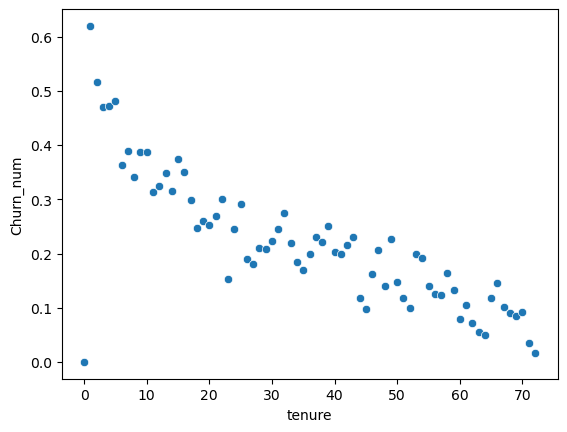

In [23]:
sns.scatterplot(data=te_ch, x='tenure', y='Churn_num')

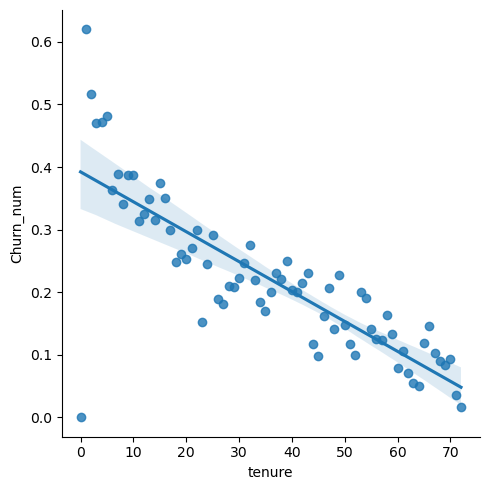

In [25]:
sns.lmplot(data=te_ch, x='tenure', y='Churn_num')

# 계약 기간이 길수록 이탈률이 더 적다. (오래될수록)

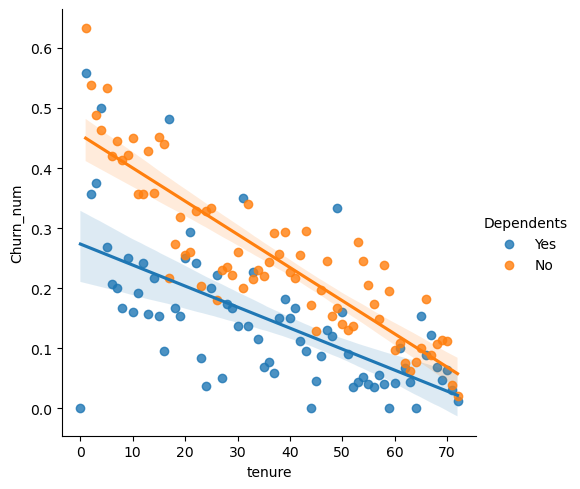

In [26]:
hue = 'Dependents'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 부양가족이 있는 경우가 없는 경우보다 이탈률이 더 낮음

In [45]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [46]:
df.describe(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

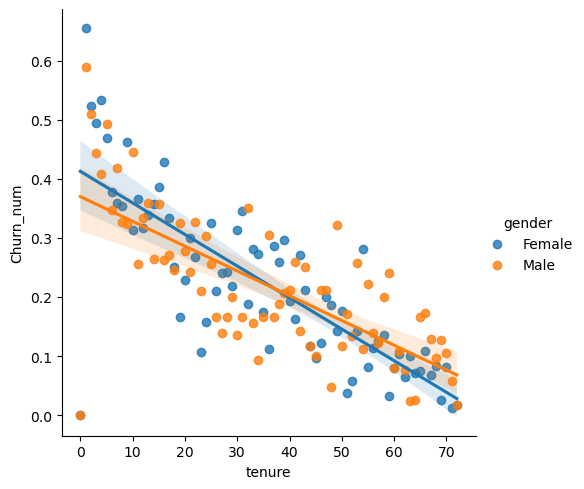

In [28]:
hue = 'gender'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 성별에 따른 차이는 없음

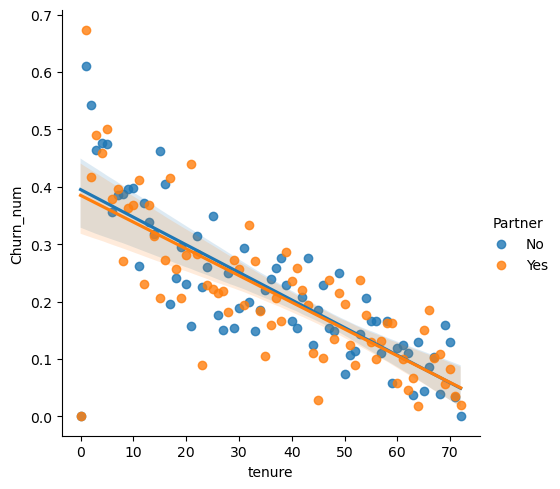

In [32]:
hue = 'Partner'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 배우자의 여부에 따른 차이는 없음

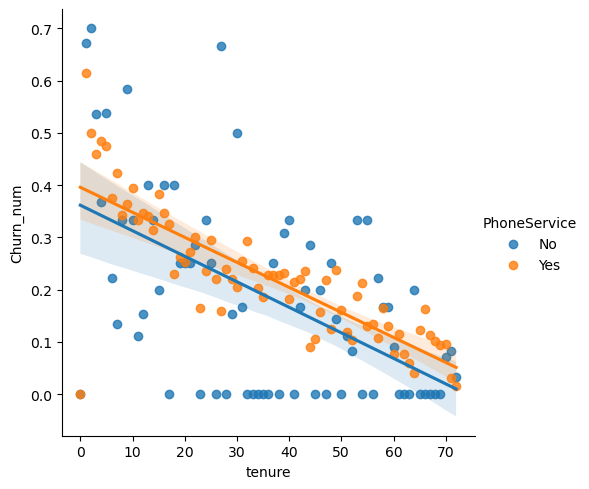

In [33]:
hue = 'PhoneService'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 핸드폰 서비스를 사용하지 않는 고객은 이탈률이 0인 경우가 많고 편차도 큼
# 핸드폰 서비스 사용 여부에 따른 차이가 없다고 볼 수 있음

In [47]:
df.loc[df['tenure'] == 32]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
107,9750-BOOHV,Female,0,No,No,32,No,No phone service,DSL,Yes,...,No,No,No,One year,No,Mailed check,30.15,927.65,No,0
174,5918-VUKWP,Female,0,No,No,32,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.55,654.55,No,0
253,3282-ZISZV,Male,0,No,Yes,32,Yes,Yes,DSL,No,...,Yes,Yes,Yes,One year,No,Credit card (automatic),83.70,2633.30,No,0
306,0265-EDXBD,Male,1,Yes,No,32,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,74.90,2303.35,Yes,1
340,6035-BXTTY,Female,1,No,No,32,Yes,No,DSL,No,...,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1830.10,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,1422-DGUBX,Male,0,Yes,No,32,Yes,Yes,Fiber optic,No,...,Yes,No,No,One year,Yes,Electronic check,79.25,2619.15,No,0
6440,2809-ZMYOQ,Female,0,No,No,32,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.35,3334.90,No,0
6822,5389-FFVKB,Male,1,Yes,No,32,Yes,No,Fiber optic,No,...,No,No,Yes,Month-to-month,Yes,Credit card (automatic),80.30,2483.05,Yes,1
6881,7078-NVFAM,Female,0,Yes,Yes,32,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,35.15,1051.05,No,0


In [48]:
df.loc[df['tenure'] == 32]['PhoneService'].value_counts()

Yes    65
No      4
Name: PhoneService, dtype: int64

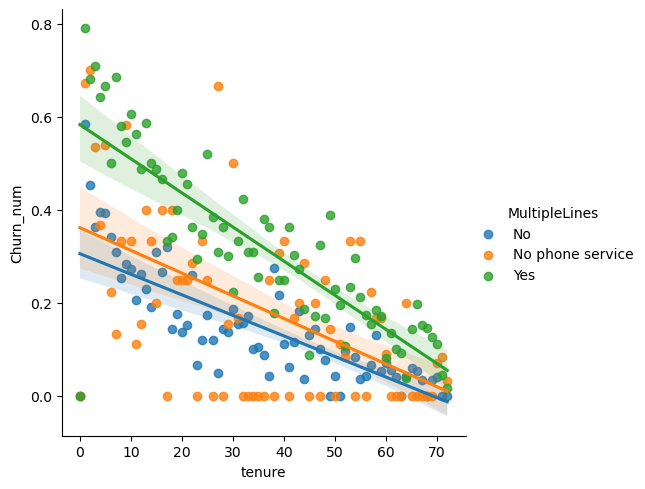

In [34]:
hue = 'MultipleLines'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 다중 회선을 사용하는 경우 이탈률이 더 높아짐

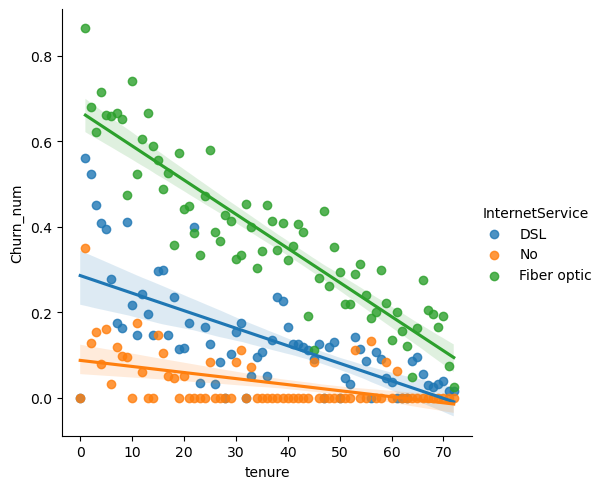

In [35]:
hue = 'InternetService'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 더 빠른 인터넷을 사용하는 경우 이탈률이 높아짐
# 인터넷 서비스는 Fiber optic, DSL, 사용하지 않음 순으로 이탈률이 낮다.

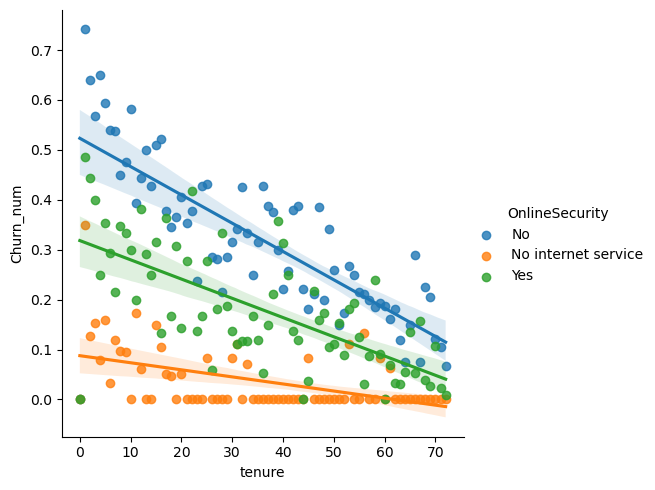

In [36]:
hue = 'OnlineSecurity'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 온라인 보안을 사용하는 고객인 경우 이탈률이 낮아짐

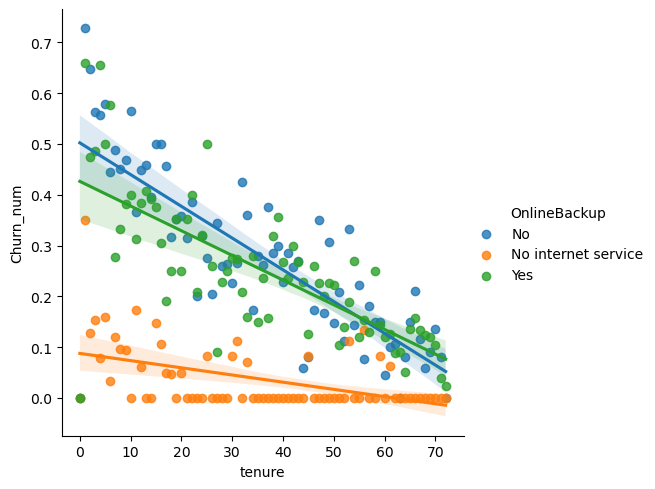

In [37]:
hue = 'OnlineBackup'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 온라인 백업 서비스 이용 여부에 따른 차이는 없음

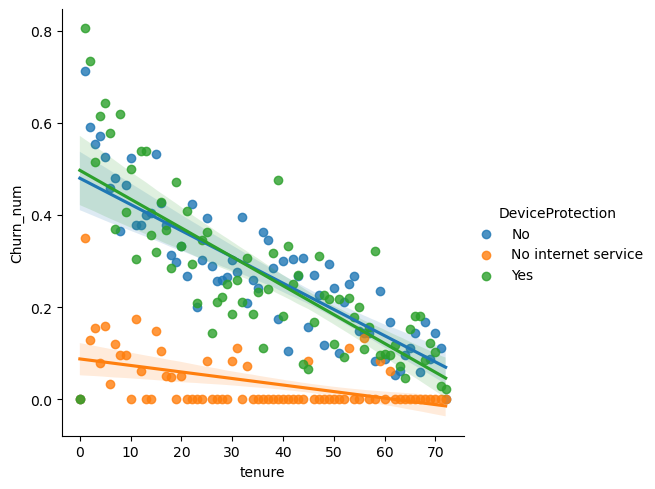

In [38]:
hue = 'DeviceProtection'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 기기보호 서비스 이용 여부에 따른 이탈률 차이는 없음

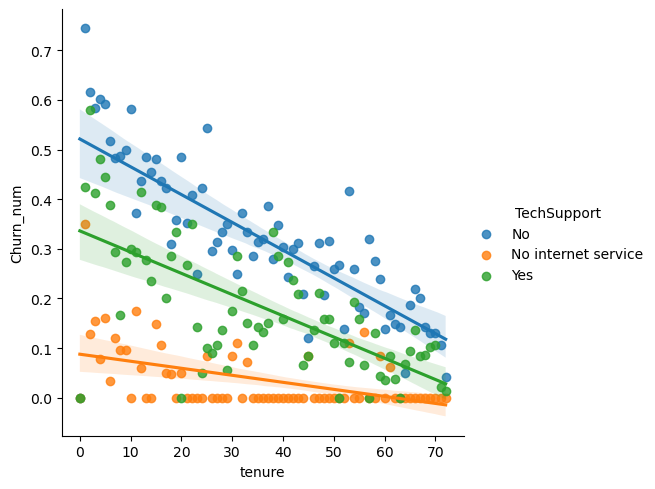

In [39]:
hue = 'TechSupport'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 기술 지원 서비스를 이용하는 경우 이탈률이 낮아짐

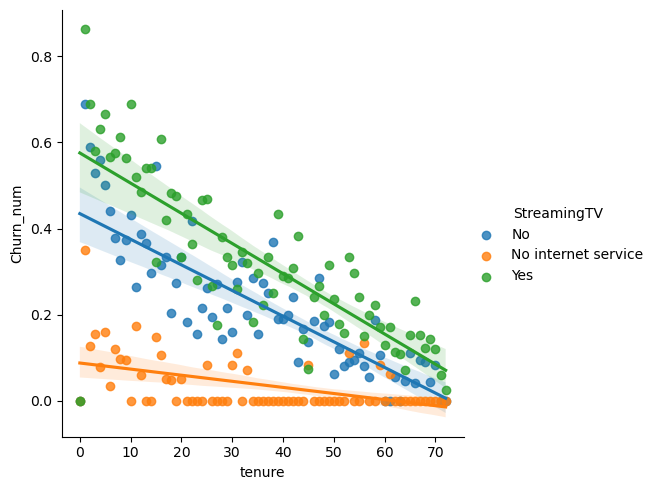

In [40]:
hue = 'StreamingTV'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 스트리밍 TV 서비스를 이용하는 고객의 경우 이탈률이 높아짐

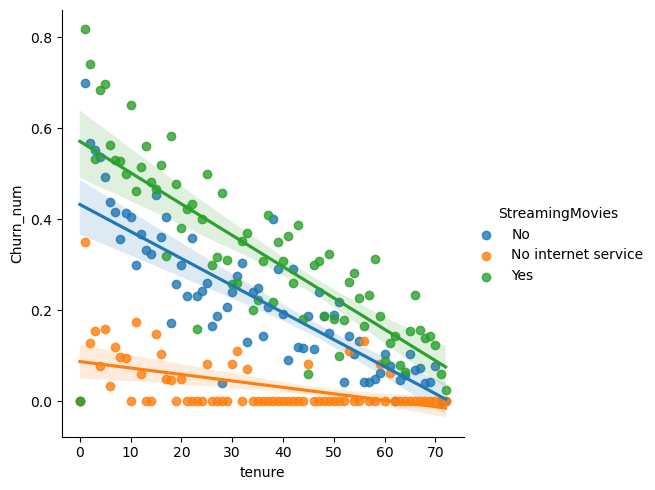

In [41]:
hue = 'StreamingMovies'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 스트리밍 영화 서비스를 이용하는 고객의 경우 이탈률이 높아짐

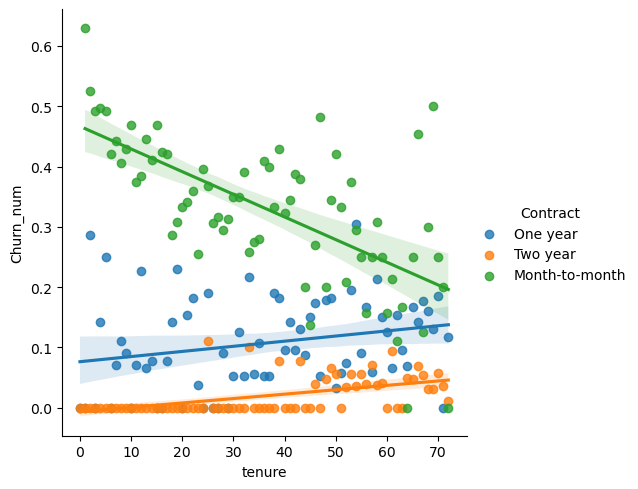

In [42]:
hue = 'Contract'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 늘어남에 따라 이탈률이 감소한다는 특징이 유지되지 않음
# 2년 계약은 계약 기간이 24개월까지 0%이고 이후에 이탈률이 증가함
# 1년 계약에서는 2년 계약의 패턴이 보이지 않음
# 결제 갱신 주기가 짧아질수록 이탈률이 높아짐

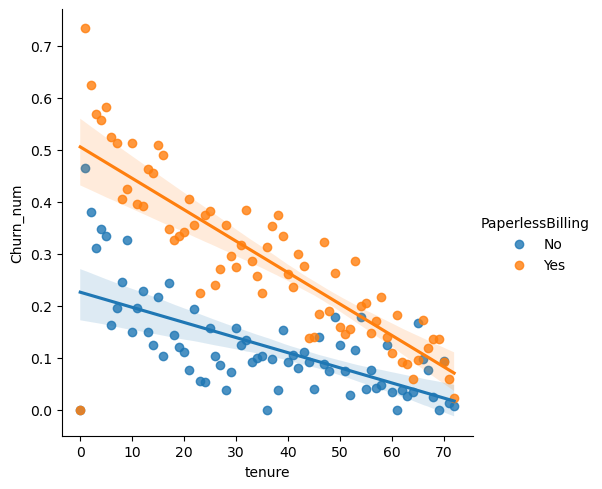

In [43]:
hue = 'PaperlessBilling'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 청구서가 paperless일 경우 이탈률이 높음

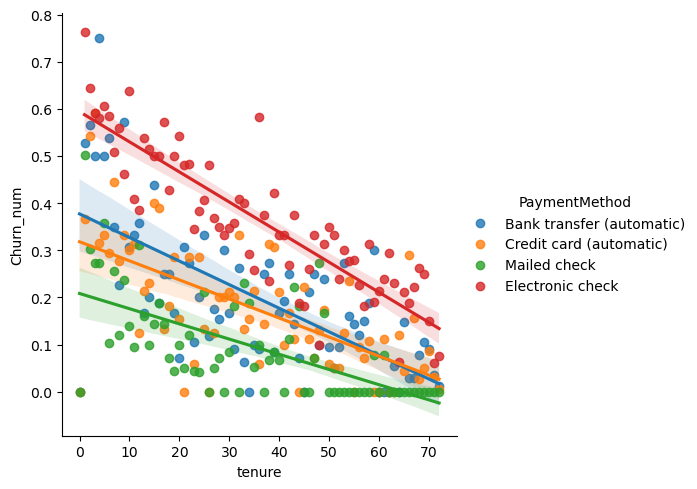

In [44]:
hue = 'PaymentMethod'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num':np.mean}).reset_index()
sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)

# 계약 기간이 길어짐에 따라 이탈률이 감소함
# 전자 통지서가 가장 이탈률이 높음
# 계좌이체, 카드 결제는 중간 수준
# 지불 방식이 스마트할수록 이탈률이 높아짐
# 지불 방식이 아날로그적일수록 이탈률이 낮아짐

## EDA
#### 공통 특징
- 결제 갱신 주기를 제외한 나머지 조건에서는 계약 기간이 길어짐에 따라 이탈률이 감소함

#### 고객 정보 기반 특징
- 성별, 동반자에 따른 이탈률의 차이는 없음
- 부양 가족이 있는 경우 이탈률이 낮음

#### 서비스 종류 기반 특징
- 핸드폰 서비스, 백업 서비스, 기기 보호 서비스에 따른 이탈률의 차이는 없음
- 다중 회선, 스트리밍 서비스(TV, 영화)를 사용하거나 인터넷 속도가 빠를수록 이탈률이 높아짐 → 돈을 더 낼수록 이탈률이 높아짐
- 보안 서비스, 기술 지원 서비스를 이용하면 이탈률이 낮아짐 → 돈을 낼수록 이탈률이 낮아짐

#### 계약 정보 기반 특징
- 계약 기간이 늘어남에 따라 이탈률이 감소한다는 특징이 유지되지 않음
- 결제 갱신 주기가 짧아질수록 이탈률이 높아짐
- 통지서가 paperless 일 경우 이탈률이 높아짐
- 지불 방식의 발전 순서대로 이탈률이 높아짐